In [1]:
'''메인 라이브러리'''
import numpy as np
import pandas as pd
import os

'''시각화 관련 라이브러리'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''데이터 준비 관련 라이브러'''
from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report 

'''알고리즘 관련 라이브러'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [2]:
# 데이터 준비

In [37]:
# 데이터 수집
current_path = os.getcwd()
file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'credit_card.csv'])
data = pd.read_csv(current_path + file)

In [38]:
# 데이터 탐색
data.shape

(284807, 31)

In [39]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [41]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [42]:
print("Number of fraudulent transactions:", data['Class'].sum())

Number of fraudulent transactions: 492


In [43]:
nanCounter = np.isnan(data).sum()

In [44]:
nanCounter

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [45]:
distinctCounter = data.apply(lambda x: len(x.unique()))

In [46]:
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [47]:
# 피쳐 행렬 및 레이블 배열 생성하기
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

In [48]:
# 피쳐 스케일링
featuresToScale = dataX.drop(['Time'],axis=1).columns

In [49]:
featuresToScale

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [50]:
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])
scalingFactors = pd.DataFrame(data=[sX.mean_,sX.scale_],index=['Mean','StDev'],columns=featuresToScale)

In [51]:
scalingFactors

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619
StDev,1.958692e+00,1.651306e+00,1.516252e+00,1.415866e+00,1.380244e+00,1.332269e+00,1.237091e+00,1.194351e+00,1.098630e+00,1.088848e+00,...,7.709237e-01,7.345227e-01,7.257003e-01,6.244592e-01,6.056460e-01,5.212772e-01,4.822262e-01,4.036318e-01,3.300827e-01,250.119670


In [52]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-8.157366e-16,3.154853e-17,-4.409878e-15,-6.734811e-16,-2.874435e-16,4.168992e-16,-8.767997e-16,-2.423604e-16,3.078727e-16,...,2.754870e-16,1.685077e-17,1.478472e-15,-6.797197e-16,1.234659e-16,-7.659279e-16,3.247603e-16,-2.953495e-18,5.401572e-17,3.202236e-16
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


In [53]:
correlationMatrix = pd.DataFrame(data=[],index=dataX.columns,columns=dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0],2)

In [54]:
correlation_file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'correlationMatrix.csv'])
correlationMatrix.to_csv(current_path+correlation_file)

Text(0, 0.5, 'Frequency Percentage')

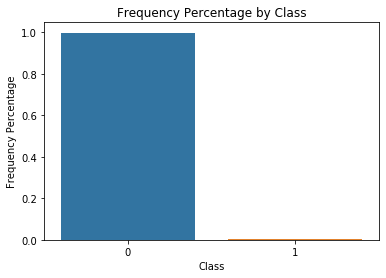

In [55]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
ax = sns.barplot(x=count_classes.index, y=tuple(count_classes/len(data)))
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

In [56]:
# 모델 준비

In [57]:
X_train, X_test, y_train, y_test = train_test_split(dataX, 
                                    dataY, test_size=0.33, 
                                    random_state=2018, stratify=dataY)

In [58]:
len(X_train)

190820

In [59]:
len(X_test)

93987

In [60]:
y_train.sum()/len(y_train)

0.0017293784718582959

In [61]:
y_test.sum()/len(y_test)

0.0017236426314277506

In [62]:
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2018)

In [63]:
# 로지스틱 회귀분석

In [64]:
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)

In [65]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = logReg

for train_index, cv_index in k_fold.split(np.zeros(len(X_train))
                                          ,y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, 
                               model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, 
                         predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLogisticRegression = log_loss(y_train, 
                                     predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

Training Log Loss:  0.10315548787866907
CV Log Loss:  0.10899252380163221
Training Log Loss:  0.10808654441515525
CV Log Loss:  0.10349837191186405
Training Log Loss:  0.0933784061193705
CV Log Loss:  0.095037274492573
Training Log Loss:  0.11767834229565328
CV Log Loss:  0.11834428976610788
Training Log Loss:  0.12369331549997062
CV Log Loss:  0.12197630594447521
Logistic Regression Log Loss:  0.10956975318333047


In [66]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()

In [67]:
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])

In [68]:
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.72')

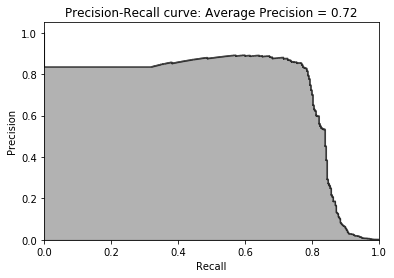

In [69]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [70]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])

In [71]:
areaUnderROC = auc(fpr, tpr)

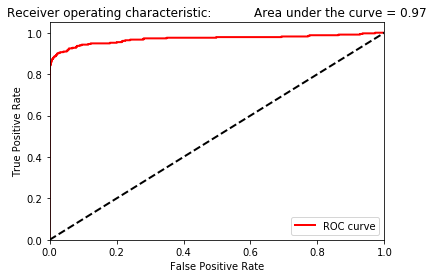

In [72]:
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [73]:
n_estimators = 10
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators, 
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
        class_weight=class_weight)

In [74]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = RFC

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, \
                                model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossRandomForestsClassifier = log_loss(y_train, 
                                          predictionsBasedOnKFolds.loc[:,1])
print('Random Forests Log Loss: ', loglossRandomForestsClassifier)

Training Log Loss:  0.00038666468324144877
CV Log Loss:  0.0153965105968685
Training Log Loss:  0.0004263217817373472
CV Log Loss:  0.010755953739346607
Training Log Loss:  0.0004088335711949752
CV Log Loss:  0.015386056391658222
Training Log Loss:  0.000430335389253032
CV Log Loss:  0.0047639585692903445
Training Log Loss:  0.00045596089565145143
CV Log Loss:  0.005619921221138471
Random Forests Log Loss:  0.010384480103660427


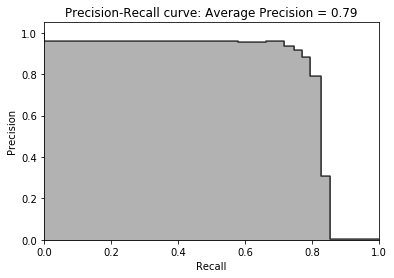

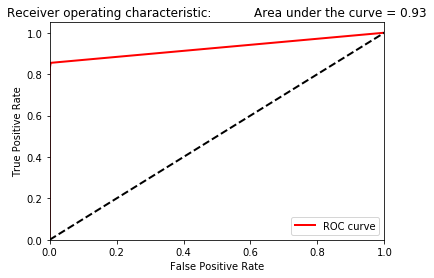

In [75]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(
          areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [76]:
params_xGB = {
    'nthread':16, # 코어 수
    'learning rate': 0.3, # 학습률 : 범위 (0 ~ 1) , 디폴트 0.3
    'gamma': 0, # 감마 : 범위 (0 ~ 무한대) , 디폴트 0
        # 이 값이 높으면 복잡성이 감소(편향 증가, 변동 감소) 
    'max_depth': 6, # max_depth : 범위 (1 ~ 무한대) , 디폴트 6 ## 트리의 최대 깊이
    'min_child_weight': 1, # min_child_weight : 범위 (0 ~ 무한대) , 디폴트 1 ## 자식노드에 필요한 가중치의 최소 합계
    'max_delta_step': 0, # max_delta_step : 범위 (0 ~ 무한대) ,  디폴트 0 ## 각 트리의 가중치 추정을 위한 최대 델타 단계
    'subsample': 1.0, # subsample : 범위 (0 ~ 1) , 디폴트 1
        # 훈련 데이터의 샘플링 비율
    'colsample_bytree': 1.0, # colsample_bytree : 범위 (0 ~ 1) , 디폴트 1
        # 훈련 피쳐의 샘플링 비율
    'objective':'binary:logistic',
    'num_class':1,
    'eval_metric':'logloss',
    'seed':2018,
    'silent':1
}

In [77]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                    index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    dtrain = xgb.DMatrix(data=X_train_fold, label=y_train_fold)
    dCV = xgb.DMatrix(data=X_cv_fold)
    
    bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000, 
                 nfold=5, early_stopping_rounds=200, verbose_eval=50)
    
    # 수정 사항 : np.arrary 로 재정의 하면서 경고 메세지를 지울 수 있음
    best_rounds = np.argmin(np.array(bst['test-logloss-mean']))
    bst = xgb.train(params_xGB, dtrain, best_rounds)
    
    loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        bst.predict(dCV)
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossXGBoostGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('XGBoost Gradient Boosting Log Loss: ', loglossXGBoostGradientBoosting)

[0]	train-logloss:0.437914+1.92395e-05	test-logloss:0.438049+8.19185e-05
[50]	train-logloss:0.0001296+6.77052e-06	test-logloss:0.0028724+0.000628049
[100]	train-logloss:5.46e-05+1.62481e-06	test-logloss:0.0031214+0.000677471
[150]	train-logloss:4.1e-05+1.26491e-06	test-logloss:0.0032148+0.000705544
[200]	train-logloss:3.48e-05+7.48331e-07	test-logloss:0.0032706+0.000710398
Training Log Loss:  0.0007995564103719956
CV Log Loss:  0.003984720182443181
[0]	train-logloss:0.437956+2.13073e-05	test-logloss:0.438073+1.47431e-05
[50]	train-logloss:0.000139+5.65685e-06	test-logloss:0.003058+0.000534268
[100]	train-logloss:5.72e-05+1.72047e-06	test-logloss:0.0033086+0.000631136
[150]	train-logloss:4.28e-05+7.48331e-07	test-logloss:0.0034082+0.000667023
[200]	train-logloss:3.6e-05+6.32456e-07	test-logloss:0.0034574+0.000660458
Training Log Loss:  0.0008313191472087722
CV Log Loss:  0.002954527787504786
[0]	train-logloss:0.437913+1.21227e-05	test-logloss:0.438024+4.79458e-05
[50]	train-logloss:0.00

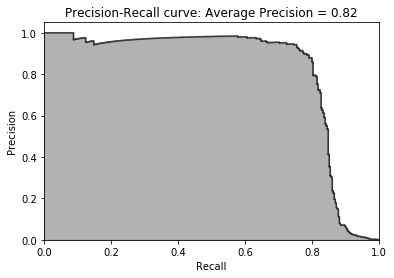

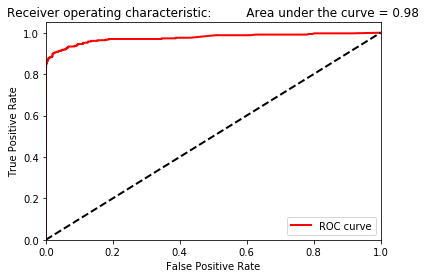

In [78]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsXGBoostGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
        Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [79]:
params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':16
}

In [80]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
                gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLightGBMGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('LightGBM Gradient Boosting Log Loss: ', loglossLightGBMGradientBoosting)

[1]	valid_0's binary_logloss: 0.00675212
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.00667184
[3]	valid_0's binary_logloss: 0.00661729
[4]	valid_0's binary_logloss: 0.00655233
[5]	valid_0's binary_logloss: 0.00649449
[6]	valid_0's binary_logloss: 0.00644269
[7]	valid_0's binary_logloss: 0.00638723
[8]	valid_0's binary_logloss: 0.00634131
[9]	valid_0's binary_logloss: 0.00628283
[10]	valid_0's binary_logloss: 0.00622916
[11]	valid_0's binary_logloss: 0.00618758
[12]	valid_0's binary_logloss: 0.00614225
[13]	valid_0's binary_logloss: 0.00609712
[14]	valid_0's binary_logloss: 0.0060647
[15]	valid_0's binary_logloss: 0.00602847
[16]	valid_0's binary_logloss: 0.00599061
[17]	valid_0's binary_logloss: 0.00595727
[18]	valid_0's binary_logloss: 0.0059192
[19]	valid_0's binary_logloss: 0.00588795
[20]	valid_0's binary_logloss: 0.00585516
[21]	valid_0's binary_logloss: 0.00582651
[22]	valid_0's binary_logloss: 0.00579678
[23]	valid_0's binary_lo

[206]	valid_0's binary_logloss: 0.00411765
[207]	valid_0's binary_logloss: 0.00411868
[208]	valid_0's binary_logloss: 0.00411691
[209]	valid_0's binary_logloss: 0.0041146
[210]	valid_0's binary_logloss: 0.0041125
[211]	valid_0's binary_logloss: 0.00410899
[212]	valid_0's binary_logloss: 0.00411017
[213]	valid_0's binary_logloss: 0.00410819
[214]	valid_0's binary_logloss: 0.00410786
[215]	valid_0's binary_logloss: 0.00410584
[216]	valid_0's binary_logloss: 0.00410278
[217]	valid_0's binary_logloss: 0.00410095
[218]	valid_0's binary_logloss: 0.00410228
[219]	valid_0's binary_logloss: 0.00410127
[220]	valid_0's binary_logloss: 0.00410211
[221]	valid_0's binary_logloss: 0.00410014
[222]	valid_0's binary_logloss: 0.00409881
[223]	valid_0's binary_logloss: 0.00409762
[224]	valid_0's binary_logloss: 0.00409912
[225]	valid_0's binary_logloss: 0.00409879
[226]	valid_0's binary_logloss: 0.00409805
[227]	valid_0's binary_logloss: 0.00409698
[228]	valid_0's binary_logloss: 0.00409633
[229]	valid_0

[405]	valid_0's binary_logloss: 0.0041578
[406]	valid_0's binary_logloss: 0.00415633
[407]	valid_0's binary_logloss: 0.004156
[408]	valid_0's binary_logloss: 0.0041565
[409]	valid_0's binary_logloss: 0.00415701
[410]	valid_0's binary_logloss: 0.0041571
[411]	valid_0's binary_logloss: 0.00415787
[412]	valid_0's binary_logloss: 0.00415787
[413]	valid_0's binary_logloss: 0.00415666
[414]	valid_0's binary_logloss: 0.00415718
[415]	valid_0's binary_logloss: 0.00415686
[416]	valid_0's binary_logloss: 0.00415775
[417]	valid_0's binary_logloss: 0.00415808
[418]	valid_0's binary_logloss: 0.00415826
[419]	valid_0's binary_logloss: 0.00415898
[420]	valid_0's binary_logloss: 0.0041595
[421]	valid_0's binary_logloss: 0.00416093
[422]	valid_0's binary_logloss: 0.00416113
[423]	valid_0's binary_logloss: 0.00416029
[424]	valid_0's binary_logloss: 0.00416011
[425]	valid_0's binary_logloss: 0.00416066
[426]	valid_0's binary_logloss: 0.00416068
[427]	valid_0's binary_logloss: 0.00416037
[428]	valid_0's b

[141]	valid_0's binary_logloss: 0.00333678
[142]	valid_0's binary_logloss: 0.00333096
[143]	valid_0's binary_logloss: 0.00332628
[144]	valid_0's binary_logloss: 0.00332132
[145]	valid_0's binary_logloss: 0.00331599
[146]	valid_0's binary_logloss: 0.00331072
[147]	valid_0's binary_logloss: 0.00330563
[148]	valid_0's binary_logloss: 0.00330046
[149]	valid_0's binary_logloss: 0.00329596
[150]	valid_0's binary_logloss: 0.00329103
[151]	valid_0's binary_logloss: 0.0032868
[152]	valid_0's binary_logloss: 0.00328178
[153]	valid_0's binary_logloss: 0.00327675
[154]	valid_0's binary_logloss: 0.00327241
[155]	valid_0's binary_logloss: 0.00326732
[156]	valid_0's binary_logloss: 0.00326314
[157]	valid_0's binary_logloss: 0.00325833
[158]	valid_0's binary_logloss: 0.00325347
[159]	valid_0's binary_logloss: 0.00324802
[160]	valid_0's binary_logloss: 0.00324562
[161]	valid_0's binary_logloss: 0.0032422
[162]	valid_0's binary_logloss: 0.00323993
[163]	valid_0's binary_logloss: 0.00323563
[164]	valid_0

[342]	valid_0's binary_logloss: 0.00299228
[343]	valid_0's binary_logloss: 0.00299276
[344]	valid_0's binary_logloss: 0.00299294
[345]	valid_0's binary_logloss: 0.002993
[346]	valid_0's binary_logloss: 0.00299331
[347]	valid_0's binary_logloss: 0.00299339
[348]	valid_0's binary_logloss: 0.0029941
[349]	valid_0's binary_logloss: 0.00299426
[350]	valid_0's binary_logloss: 0.00299452
[351]	valid_0's binary_logloss: 0.00299367
[352]	valid_0's binary_logloss: 0.00299427
[353]	valid_0's binary_logloss: 0.0029945
[354]	valid_0's binary_logloss: 0.00299598
[355]	valid_0's binary_logloss: 0.00299654
[356]	valid_0's binary_logloss: 0.00299711
[357]	valid_0's binary_logloss: 0.00299737
[358]	valid_0's binary_logloss: 0.00299811
[359]	valid_0's binary_logloss: 0.00299789
[360]	valid_0's binary_logloss: 0.00299769
[361]	valid_0's binary_logloss: 0.00299794
[362]	valid_0's binary_logloss: 0.00299776
[363]	valid_0's binary_logloss: 0.00299813
[364]	valid_0's binary_logloss: 0.00299822
[365]	valid_0's

[539]	valid_0's binary_logloss: 0.00298067
[540]	valid_0's binary_logloss: 0.00298112
[541]	valid_0's binary_logloss: 0.00298063
[542]	valid_0's binary_logloss: 0.00298128
[543]	valid_0's binary_logloss: 0.0029817
[544]	valid_0's binary_logloss: 0.00298163
[545]	valid_0's binary_logloss: 0.00298147
[546]	valid_0's binary_logloss: 0.00298132
[547]	valid_0's binary_logloss: 0.00298063
[548]	valid_0's binary_logloss: 0.00298079
[549]	valid_0's binary_logloss: 0.0029807
[550]	valid_0's binary_logloss: 0.00297993
[551]	valid_0's binary_logloss: 0.0029803
[552]	valid_0's binary_logloss: 0.00298101
[553]	valid_0's binary_logloss: 0.00298147
[554]	valid_0's binary_logloss: 0.00298221
[555]	valid_0's binary_logloss: 0.00298213
[556]	valid_0's binary_logloss: 0.00298235
[557]	valid_0's binary_logloss: 0.00298315
[558]	valid_0's binary_logloss: 0.00298333
[559]	valid_0's binary_logloss: 0.00298325
[560]	valid_0's binary_logloss: 0.00298373
[561]	valid_0's binary_logloss: 0.00298373
[562]	valid_0'

[32]	valid_0's binary_logloss: 0.00571394
[33]	valid_0's binary_logloss: 0.00568509
[34]	valid_0's binary_logloss: 0.00565735
[35]	valid_0's binary_logloss: 0.00562832
[36]	valid_0's binary_logloss: 0.00560079
[37]	valid_0's binary_logloss: 0.00557477
[38]	valid_0's binary_logloss: 0.00554884
[39]	valid_0's binary_logloss: 0.00552424
[40]	valid_0's binary_logloss: 0.00550132
[41]	valid_0's binary_logloss: 0.00547781
[42]	valid_0's binary_logloss: 0.00545463
[43]	valid_0's binary_logloss: 0.00543303
[44]	valid_0's binary_logloss: 0.00541166
[45]	valid_0's binary_logloss: 0.00539113
[46]	valid_0's binary_logloss: 0.00537026
[47]	valid_0's binary_logloss: 0.00534901
[48]	valid_0's binary_logloss: 0.00532929
[49]	valid_0's binary_logloss: 0.00530867
[50]	valid_0's binary_logloss: 0.00529023
[51]	valid_0's binary_logloss: 0.0052712
[52]	valid_0's binary_logloss: 0.00524905
[53]	valid_0's binary_logloss: 0.0052307
[54]	valid_0's binary_logloss: 0.00521233
[55]	valid_0's binary_logloss: 0.005

[234]	valid_0's binary_logloss: 0.00402207
[235]	valid_0's binary_logloss: 0.00402167
[236]	valid_0's binary_logloss: 0.00402009
[237]	valid_0's binary_logloss: 0.0040194
[238]	valid_0's binary_logloss: 0.00401911
[239]	valid_0's binary_logloss: 0.00401845
[240]	valid_0's binary_logloss: 0.00401721
[241]	valid_0's binary_logloss: 0.00401701
[242]	valid_0's binary_logloss: 0.00401648
[243]	valid_0's binary_logloss: 0.00401541
[244]	valid_0's binary_logloss: 0.00401488
[245]	valid_0's binary_logloss: 0.00401438
[246]	valid_0's binary_logloss: 0.00401461
[247]	valid_0's binary_logloss: 0.00401373
[248]	valid_0's binary_logloss: 0.00401257
[249]	valid_0's binary_logloss: 0.00401114
[250]	valid_0's binary_logloss: 0.00401103
[251]	valid_0's binary_logloss: 0.00401073
[252]	valid_0's binary_logloss: 0.00401083
[253]	valid_0's binary_logloss: 0.00401137
[254]	valid_0's binary_logloss: 0.00401119
[255]	valid_0's binary_logloss: 0.0040113
[256]	valid_0's binary_logloss: 0.00401064
[257]	valid_0

[434]	valid_0's binary_logloss: 0.00396655
[435]	valid_0's binary_logloss: 0.00396606
[436]	valid_0's binary_logloss: 0.00396451
[437]	valid_0's binary_logloss: 0.00396626
[438]	valid_0's binary_logloss: 0.0039658
[439]	valid_0's binary_logloss: 0.00396628
[440]	valid_0's binary_logloss: 0.00396424
[441]	valid_0's binary_logloss: 0.00396279
[442]	valid_0's binary_logloss: 0.00396232
[443]	valid_0's binary_logloss: 0.00396166
[444]	valid_0's binary_logloss: 0.00396119
[445]	valid_0's binary_logloss: 0.00396293
[446]	valid_0's binary_logloss: 0.00396094
[447]	valid_0's binary_logloss: 0.00395947
[448]	valid_0's binary_logloss: 0.00395982
[449]	valid_0's binary_logloss: 0.00395941
[450]	valid_0's binary_logloss: 0.00395804
[451]	valid_0's binary_logloss: 0.00395644
[452]	valid_0's binary_logloss: 0.00395611
[453]	valid_0's binary_logloss: 0.00395785
[454]	valid_0's binary_logloss: 0.00395592
[455]	valid_0's binary_logloss: 0.00395644
[456]	valid_0's binary_logloss: 0.00395436
[457]	valid_

[638]	valid_0's binary_logloss: 0.00393332
[639]	valid_0's binary_logloss: 0.00393227
[640]	valid_0's binary_logloss: 0.00393284
[641]	valid_0's binary_logloss: 0.00393249
[642]	valid_0's binary_logloss: 0.0039345
[643]	valid_0's binary_logloss: 0.00393388
[644]	valid_0's binary_logloss: 0.00393373
[645]	valid_0's binary_logloss: 0.00393358
[646]	valid_0's binary_logloss: 0.00393438
[647]	valid_0's binary_logloss: 0.00393494
[648]	valid_0's binary_logloss: 0.00393461
[649]	valid_0's binary_logloss: 0.00393585
[650]	valid_0's binary_logloss: 0.00393687
[651]	valid_0's binary_logloss: 0.00393723
[652]	valid_0's binary_logloss: 0.00393605
[653]	valid_0's binary_logloss: 0.00393608
[654]	valid_0's binary_logloss: 0.00393508
[655]	valid_0's binary_logloss: 0.00393634
[656]	valid_0's binary_logloss: 0.00393691
[657]	valid_0's binary_logloss: 0.00393664
[658]	valid_0's binary_logloss: 0.00393662
[659]	valid_0's binary_logloss: 0.00393552
[660]	valid_0's binary_logloss: 0.00393725
[661]	valid_

[840]	valid_0's binary_logloss: 0.00398378
[841]	valid_0's binary_logloss: 0.00398501
[842]	valid_0's binary_logloss: 0.00398609
[843]	valid_0's binary_logloss: 0.00398785
[844]	valid_0's binary_logloss: 0.00398844
[845]	valid_0's binary_logloss: 0.00398841
[846]	valid_0's binary_logloss: 0.00398959
[847]	valid_0's binary_logloss: 0.00398965
[848]	valid_0's binary_logloss: 0.00398958
[849]	valid_0's binary_logloss: 0.00398943
[850]	valid_0's binary_logloss: 0.00398921
[851]	valid_0's binary_logloss: 0.00399005
[852]	valid_0's binary_logloss: 0.00399076
[853]	valid_0's binary_logloss: 0.00399106
[854]	valid_0's binary_logloss: 0.00399176
[855]	valid_0's binary_logloss: 0.00399124
[856]	valid_0's binary_logloss: 0.00399161
[857]	valid_0's binary_logloss: 0.00399219
[858]	valid_0's binary_logloss: 0.00399227
[859]	valid_0's binary_logloss: 0.00399313
[860]	valid_0's binary_logloss: 0.00399383
[861]	valid_0's binary_logloss: 0.00399481
[862]	valid_0's binary_logloss: 0.00399531
[863]	valid

[113]	valid_0's binary_logloss: 0.00293802
[114]	valid_0's binary_logloss: 0.00292977
[115]	valid_0's binary_logloss: 0.00292036
[116]	valid_0's binary_logloss: 0.00291187
[117]	valid_0's binary_logloss: 0.00290287
[118]	valid_0's binary_logloss: 0.00289383
[119]	valid_0's binary_logloss: 0.00288591
[120]	valid_0's binary_logloss: 0.00287732
[121]	valid_0's binary_logloss: 0.00286822
[122]	valid_0's binary_logloss: 0.00285984
[123]	valid_0's binary_logloss: 0.0028519
[124]	valid_0's binary_logloss: 0.00284332
[125]	valid_0's binary_logloss: 0.00283353
[126]	valid_0's binary_logloss: 0.00282459
[127]	valid_0's binary_logloss: 0.00281571
[128]	valid_0's binary_logloss: 0.00280715
[129]	valid_0's binary_logloss: 0.00279871
[130]	valid_0's binary_logloss: 0.00279072
[131]	valid_0's binary_logloss: 0.00278254
[132]	valid_0's binary_logloss: 0.00277435
[133]	valid_0's binary_logloss: 0.00276593
[134]	valid_0's binary_logloss: 0.0027579
[135]	valid_0's binary_logloss: 0.00274973
[136]	valid_0

[309]	valid_0's binary_logloss: 0.00204555
[310]	valid_0's binary_logloss: 0.00204404
[311]	valid_0's binary_logloss: 0.00204232
[312]	valid_0's binary_logloss: 0.00204043
[313]	valid_0's binary_logloss: 0.00203874
[314]	valid_0's binary_logloss: 0.00203705
[315]	valid_0's binary_logloss: 0.0020359
[316]	valid_0's binary_logloss: 0.00203397
[317]	valid_0's binary_logloss: 0.00203297
[318]	valid_0's binary_logloss: 0.00203166
[319]	valid_0's binary_logloss: 0.00203014
[320]	valid_0's binary_logloss: 0.00202922
[321]	valid_0's binary_logloss: 0.00202762
[322]	valid_0's binary_logloss: 0.00202557
[323]	valid_0's binary_logloss: 0.00202432
[324]	valid_0's binary_logloss: 0.00202126
[325]	valid_0's binary_logloss: 0.00201948
[326]	valid_0's binary_logloss: 0.00201853
[327]	valid_0's binary_logloss: 0.00201684
[328]	valid_0's binary_logloss: 0.00201544
[329]	valid_0's binary_logloss: 0.00201431
[330]	valid_0's binary_logloss: 0.00201134
[331]	valid_0's binary_logloss: 0.00200967
[332]	valid_

[510]	valid_0's binary_logloss: 0.00188156
[511]	valid_0's binary_logloss: 0.00188145
[512]	valid_0's binary_logloss: 0.00187975
[513]	valid_0's binary_logloss: 0.00187971
[514]	valid_0's binary_logloss: 0.0018799
[515]	valid_0's binary_logloss: 0.00187941
[516]	valid_0's binary_logloss: 0.00187717
[517]	valid_0's binary_logloss: 0.00187636
[518]	valid_0's binary_logloss: 0.00187502
[519]	valid_0's binary_logloss: 0.00187339
[520]	valid_0's binary_logloss: 0.00187293
[521]	valid_0's binary_logloss: 0.00187286
[522]	valid_0's binary_logloss: 0.00187277
[523]	valid_0's binary_logloss: 0.00187244
[524]	valid_0's binary_logloss: 0.0018708
[525]	valid_0's binary_logloss: 0.00187065
[526]	valid_0's binary_logloss: 0.00187001
[527]	valid_0's binary_logloss: 0.00187006
[528]	valid_0's binary_logloss: 0.00186992
[529]	valid_0's binary_logloss: 0.00186915
[530]	valid_0's binary_logloss: 0.0018684
[531]	valid_0's binary_logloss: 0.00186827
[532]	valid_0's binary_logloss: 0.00186804
[533]	valid_0'

[708]	valid_0's binary_logloss: 0.00181668
[709]	valid_0's binary_logloss: 0.00181666
[710]	valid_0's binary_logloss: 0.00181609
[711]	valid_0's binary_logloss: 0.00181606
[712]	valid_0's binary_logloss: 0.00181475
[713]	valid_0's binary_logloss: 0.00181551
[714]	valid_0's binary_logloss: 0.00181589
[715]	valid_0's binary_logloss: 0.00181623
[716]	valid_0's binary_logloss: 0.00181518
[717]	valid_0's binary_logloss: 0.00181496
[718]	valid_0's binary_logloss: 0.00181581
[719]	valid_0's binary_logloss: 0.00181528
[720]	valid_0's binary_logloss: 0.00181541
[721]	valid_0's binary_logloss: 0.00181485
[722]	valid_0's binary_logloss: 0.00181561
[723]	valid_0's binary_logloss: 0.00181556
[724]	valid_0's binary_logloss: 0.00181589
[725]	valid_0's binary_logloss: 0.00181602
[726]	valid_0's binary_logloss: 0.001816
[727]	valid_0's binary_logloss: 0.00181563
[728]	valid_0's binary_logloss: 0.00181575
[729]	valid_0's binary_logloss: 0.00181502
[730]	valid_0's binary_logloss: 0.00181454
[731]	valid_0

[898]	valid_0's binary_logloss: 0.00182148
[899]	valid_0's binary_logloss: 0.00182159
[900]	valid_0's binary_logloss: 0.00182073
[901]	valid_0's binary_logloss: 0.00182075
[902]	valid_0's binary_logloss: 0.00182094
[903]	valid_0's binary_logloss: 0.00182065
[904]	valid_0's binary_logloss: 0.00182106
[905]	valid_0's binary_logloss: 0.00182092
[906]	valid_0's binary_logloss: 0.00182061
[907]	valid_0's binary_logloss: 0.00181995
[908]	valid_0's binary_logloss: 0.00181921
[909]	valid_0's binary_logloss: 0.00181903
[910]	valid_0's binary_logloss: 0.00181982
[911]	valid_0's binary_logloss: 0.00181988
[912]	valid_0's binary_logloss: 0.0018197
[913]	valid_0's binary_logloss: 0.00182062
[914]	valid_0's binary_logloss: 0.00182074
[915]	valid_0's binary_logloss: 0.00182044
[916]	valid_0's binary_logloss: 0.00182025
[917]	valid_0's binary_logloss: 0.00182007
[918]	valid_0's binary_logloss: 0.00182063
[919]	valid_0's binary_logloss: 0.00182046
[920]	valid_0's binary_logloss: 0.0018203
[921]	valid_0

[152]	valid_0's binary_logloss: 0.00243895
[153]	valid_0's binary_logloss: 0.00243306
[154]	valid_0's binary_logloss: 0.00242706
[155]	valid_0's binary_logloss: 0.00242159
[156]	valid_0's binary_logloss: 0.00241619
[157]	valid_0's binary_logloss: 0.00241012
[158]	valid_0's binary_logloss: 0.00240415
[159]	valid_0's binary_logloss: 0.00239812
[160]	valid_0's binary_logloss: 0.00239221
[161]	valid_0's binary_logloss: 0.00238672
[162]	valid_0's binary_logloss: 0.00238069
[163]	valid_0's binary_logloss: 0.002375
[164]	valid_0's binary_logloss: 0.00236999
[165]	valid_0's binary_logloss: 0.00236436
[166]	valid_0's binary_logloss: 0.00235869
[167]	valid_0's binary_logloss: 0.00235319
[168]	valid_0's binary_logloss: 0.00234829
[169]	valid_0's binary_logloss: 0.00234278
[170]	valid_0's binary_logloss: 0.00233744
[171]	valid_0's binary_logloss: 0.00233258
[172]	valid_0's binary_logloss: 0.0023283
[173]	valid_0's binary_logloss: 0.0023234
[174]	valid_0's binary_logloss: 0.00231809
[175]	valid_0's

[353]	valid_0's binary_logloss: 0.0018951
[354]	valid_0's binary_logloss: 0.00189303
[355]	valid_0's binary_logloss: 0.0018925
[356]	valid_0's binary_logloss: 0.00189229
[357]	valid_0's binary_logloss: 0.00189117
[358]	valid_0's binary_logloss: 0.00188963
[359]	valid_0's binary_logloss: 0.00188878
[360]	valid_0's binary_logloss: 0.00188831
[361]	valid_0's binary_logloss: 0.00188748
[362]	valid_0's binary_logloss: 0.00188511
[363]	valid_0's binary_logloss: 0.00188465
[364]	valid_0's binary_logloss: 0.0018841
[365]	valid_0's binary_logloss: 0.00188376
[366]	valid_0's binary_logloss: 0.00188275
[367]	valid_0's binary_logloss: 0.00188127
[368]	valid_0's binary_logloss: 0.00188047
[369]	valid_0's binary_logloss: 0.00188002
[370]	valid_0's binary_logloss: 0.00187934
[371]	valid_0's binary_logloss: 0.00187767
[372]	valid_0's binary_logloss: 0.00187753
[373]	valid_0's binary_logloss: 0.0018755
[374]	valid_0's binary_logloss: 0.00187474
[375]	valid_0's binary_logloss: 0.00187381
[376]	valid_0's

[545]	valid_0's binary_logloss: 0.00174751
[546]	valid_0's binary_logloss: 0.00174724
[547]	valid_0's binary_logloss: 0.00174668
[548]	valid_0's binary_logloss: 0.00174671
[549]	valid_0's binary_logloss: 0.00174654
[550]	valid_0's binary_logloss: 0.0017462
[551]	valid_0's binary_logloss: 0.00174629
[552]	valid_0's binary_logloss: 0.00174703
[553]	valid_0's binary_logloss: 0.00174704
[554]	valid_0's binary_logloss: 0.00174727
[555]	valid_0's binary_logloss: 0.00174716
[556]	valid_0's binary_logloss: 0.00174661
[557]	valid_0's binary_logloss: 0.00174736
[558]	valid_0's binary_logloss: 0.00174756
[559]	valid_0's binary_logloss: 0.00174714
[560]	valid_0's binary_logloss: 0.00174683
[561]	valid_0's binary_logloss: 0.00174705
[562]	valid_0's binary_logloss: 0.00174727
[563]	valid_0's binary_logloss: 0.00174694
[564]	valid_0's binary_logloss: 0.00174642
[565]	valid_0's binary_logloss: 0.00174582
[566]	valid_0's binary_logloss: 0.00174573
[567]	valid_0's binary_logloss: 0.00174583
[568]	valid_

[737]	valid_0's binary_logloss: 0.00171676
[738]	valid_0's binary_logloss: 0.00171613
[739]	valid_0's binary_logloss: 0.00171618
[740]	valid_0's binary_logloss: 0.00171632
[741]	valid_0's binary_logloss: 0.00171664
[742]	valid_0's binary_logloss: 0.00171678
[743]	valid_0's binary_logloss: 0.00171671
[744]	valid_0's binary_logloss: 0.00171686
[745]	valid_0's binary_logloss: 0.00171698
[746]	valid_0's binary_logloss: 0.00171693
[747]	valid_0's binary_logloss: 0.00171472
[748]	valid_0's binary_logloss: 0.00171434
[749]	valid_0's binary_logloss: 0.00171411
[750]	valid_0's binary_logloss: 0.00171416
[751]	valid_0's binary_logloss: 0.00171426
[752]	valid_0's binary_logloss: 0.00171452
[753]	valid_0's binary_logloss: 0.00171504
[754]	valid_0's binary_logloss: 0.00171286
[755]	valid_0's binary_logloss: 0.00171246
[756]	valid_0's binary_logloss: 0.00171283
[757]	valid_0's binary_logloss: 0.00171328
[758]	valid_0's binary_logloss: 0.00171345
[759]	valid_0's binary_logloss: 0.00171361
[760]	valid

[928]	valid_0's binary_logloss: 0.00171652
[929]	valid_0's binary_logloss: 0.0017162
[930]	valid_0's binary_logloss: 0.00171686
[931]	valid_0's binary_logloss: 0.00171656
[932]	valid_0's binary_logloss: 0.00171657
[933]	valid_0's binary_logloss: 0.00171697
[934]	valid_0's binary_logloss: 0.0017167
[935]	valid_0's binary_logloss: 0.00171736
[936]	valid_0's binary_logloss: 0.00171777
[937]	valid_0's binary_logloss: 0.00171828
[938]	valid_0's binary_logloss: 0.00171844
[939]	valid_0's binary_logloss: 0.00171824
[940]	valid_0's binary_logloss: 0.00171707
[941]	valid_0's binary_logloss: 0.00171659
[942]	valid_0's binary_logloss: 0.00171662
[943]	valid_0's binary_logloss: 0.00171727
[944]	valid_0's binary_logloss: 0.0017177
[945]	valid_0's binary_logloss: 0.0017169
[946]	valid_0's binary_logloss: 0.00171676
[947]	valid_0's binary_logloss: 0.00171739
[948]	valid_0's binary_logloss: 0.00171757
[949]	valid_0's binary_logloss: 0.00171841
[950]	valid_0's binary_logloss: 0.00171862
[951]	valid_0's

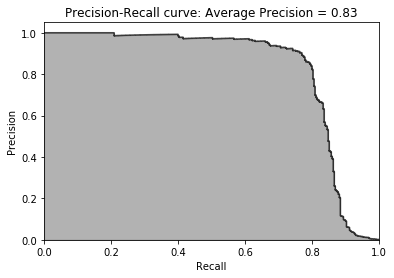

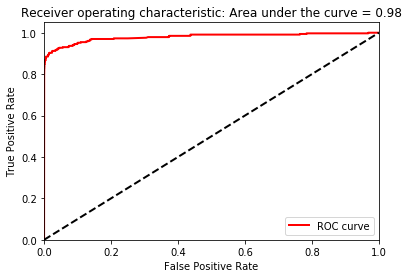

In [81]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLightGBMGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [82]:
# 테스트 데이터 셋으로 4가지 모델 평가

In [83]:
predictionsTestSetLogisticRegression = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLogisticRegression.loc[:,'prediction'] = \
    logReg.predict_proba(X_test)[:,1]
logLossTestSetLogisticRegression = \
    log_loss(y_test, predictionsTestSetLogisticRegression)

In [84]:
predictionsTestSetRandomForests = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetRandomForests.loc[:,'prediction'] = \
    RFC.predict_proba(X_test)[:,1]
logLossTestSetRandomForests = \
    log_loss(y_test, predictionsTestSetRandomForests)

In [85]:
predictionsTestSetXGBoostGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
dtest = xgb.DMatrix(data=X_test)
predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] = \
    bst.predict(dtest)
logLossTestSetXGBoostGradientBoosting = \
    log_loss(y_test, predictionsTestSetXGBoostGradientBoosting)

In [86]:
predictionsTestSetLightGBMGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLightGBMGradientBoosting.loc[:,'prediction'] = \
    gbm.predict(X_test, num_iteration=gbm.best_iteration)
logLossTestSetLightGBMGradientBoosting = \
    log_loss(y_test, predictionsTestSetLightGBMGradientBoosting)

In [87]:
print("Log Loss of Logistic Regression on Test Set: ", \
          logLossTestSetLogisticRegression)
print("Log Loss of Random Forests on Test Set: ", \
          logLossTestSetRandomForests)
print("Log Loss of XGBoost Gradient Boosting on Test Set: ", \
          logLossTestSetXGBoostGradientBoosting)
print("Log Loss of LightGBM Gradient Boosting on Test Set: ", \
          logLossTestSetLightGBMGradientBoosting)

Log Loss of Logistic Regression on Test Set:  0.1237329613131888
Log Loss of Random Forests on Test Set:  0.009181927576739956
Log Loss of XGBoost Gradient Boosting on Test Set:  0.0024911680792237684
Log Loss of LightGBM Gradient Boosting on Test Set:  0.002563389596145862


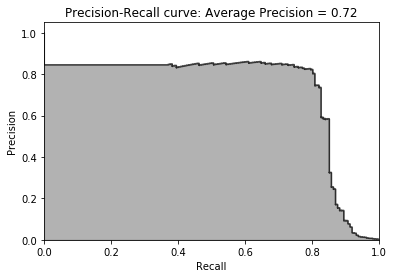

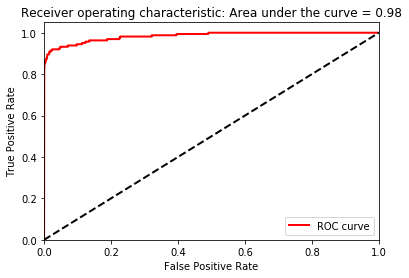

In [88]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLogisticRegression)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLogisticRegression)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetLogisticRegression)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

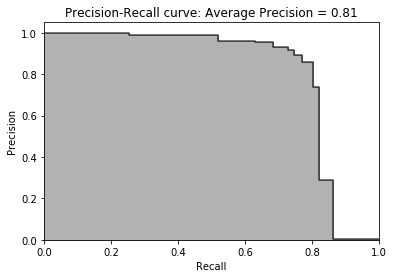

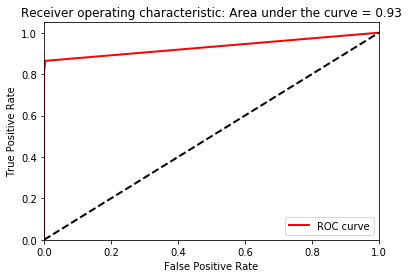

In [89]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetRandomForests)
average_precision = \
    average_precision_score(y_test,predictionsTestSetRandomForests)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetRandomForests)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

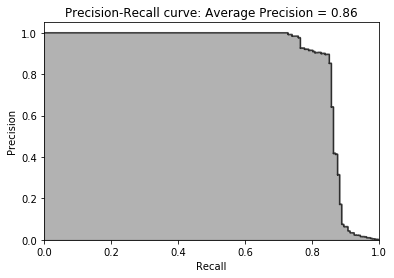

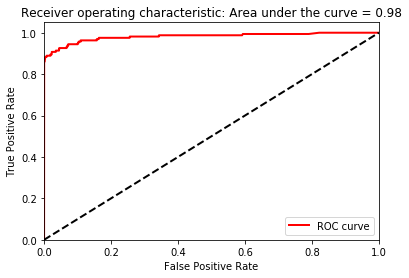

In [90]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
average_precision = \
    average_precision_score(y_test,predictionsTestSetXGBoostGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

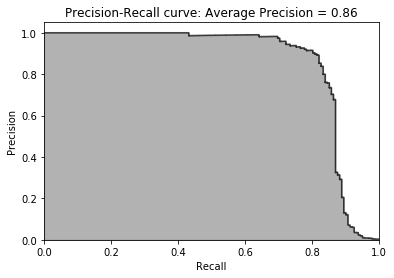

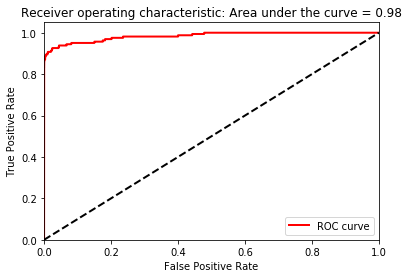

In [91]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLightGBMGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [92]:
# 앙상블

In [93]:
predictionsBasedOnKFoldsFourModels = pd.DataFrame(data=[],index=y_train.index)
predictionsBasedOnKFoldsFourModels = predictionsBasedOnKFoldsFourModels.join(
    predictionsBasedOnKFoldsLogisticRegression['prediction'].astype(float), \
    how='left').join(predictionsBasedOnKFoldsRandomForests['prediction'] \
    .astype(float),how='left',rsuffix="2").join( \
    predictionsBasedOnKFoldsXGBoostGradientBoosting['prediction'].astype(float), \
    how='left',rsuffix="3").join( \
    predictionsBasedOnKFoldsLightGBMGradientBoosting['prediction'].astype(float), \
    how='left',rsuffix="4")
predictionsBasedOnKFoldsFourModels.columns = \
    ['predsLR','predsRF','predsXGB','predsLightGBM']

In [94]:
X_trainWithPredictions = \
    X_train.merge(predictionsBasedOnKFoldsFourModels,
                  left_index=True,right_index=True)

In [95]:
params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':16
}

In [96]:
trainingScores = []
cvScores = []
predictionsBasedOnKFoldsEnsemble = \
    pd.DataFrame(data=[],index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), \
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = \
        X_trainWithPredictions.iloc[train_index,:], \
        X_trainWithPredictions.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
        gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossEnsemble = log_loss(y_train, \
        predictionsBasedOnKFoldsEnsemble.loc[:,'prediction'])
print('Ensemble Log Loss: ', loglossEnsemble)

[1]	valid_0's binary_logloss: 0.00622381
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.00615192
[3]	valid_0's binary_logloss: 0.00608111
[4]	valid_0's binary_logloss: 0.00602241
[5]	valid_0's binary_logloss: 0.00596166
[6]	valid_0's binary_logloss: 0.0059004
[7]	valid_0's binary_logloss: 0.00584361
[8]	valid_0's binary_logloss: 0.00579644
[9]	valid_0's binary_logloss: 0.00574924
[10]	valid_0's binary_logloss: 0.00570917
[11]	valid_0's binary_logloss: 0.00566335
[12]	valid_0's binary_logloss: 0.0056242
[13]	valid_0's binary_logloss: 0.00558488
[14]	valid_0's binary_logloss: 0.00554761
[15]	valid_0's binary_logloss: 0.00551214
[16]	valid_0's binary_logloss: 0.00547469
[17]	valid_0's binary_logloss: 0.00544166
[18]	valid_0's binary_logloss: 0.0054097
[19]	valid_0's binary_logloss: 0.00537345
[20]	valid_0's binary_logloss: 0.00534442
[21]	valid_0's binary_logloss: 0.00531637
[22]	valid_0's binary_logloss: 0.0052869
[23]	valid_0's binary_logl

[194]	valid_0's binary_logloss: 0.00381918
[195]	valid_0's binary_logloss: 0.00381729
[196]	valid_0's binary_logloss: 0.00381615
[197]	valid_0's binary_logloss: 0.00381434
[198]	valid_0's binary_logloss: 0.00381418
[199]	valid_0's binary_logloss: 0.00381258
[200]	valid_0's binary_logloss: 0.00381114
[201]	valid_0's binary_logloss: 0.00381137
[202]	valid_0's binary_logloss: 0.00381049
[203]	valid_0's binary_logloss: 0.00380932
[204]	valid_0's binary_logloss: 0.0038076
[205]	valid_0's binary_logloss: 0.00380484
[206]	valid_0's binary_logloss: 0.00380349
[207]	valid_0's binary_logloss: 0.00380228
[208]	valid_0's binary_logloss: 0.00380086
[209]	valid_0's binary_logloss: 0.00380055
[210]	valid_0's binary_logloss: 0.00379936
[211]	valid_0's binary_logloss: 0.00379684
[212]	valid_0's binary_logloss: 0.00379569
[213]	valid_0's binary_logloss: 0.00379454
[214]	valid_0's binary_logloss: 0.00379464
[215]	valid_0's binary_logloss: 0.00379343
[216]	valid_0's binary_logloss: 0.00379254
[217]	valid_

[390]	valid_0's binary_logloss: 0.0038404
[391]	valid_0's binary_logloss: 0.0038404
[392]	valid_0's binary_logloss: 0.00384191
[393]	valid_0's binary_logloss: 0.00384254
[394]	valid_0's binary_logloss: 0.00384469
[395]	valid_0's binary_logloss: 0.00384585
[396]	valid_0's binary_logloss: 0.00384607
[397]	valid_0's binary_logloss: 0.00384679
[398]	valid_0's binary_logloss: 0.00384662
[399]	valid_0's binary_logloss: 0.00384864
[400]	valid_0's binary_logloss: 0.00384929
[401]	valid_0's binary_logloss: 0.0038506
[402]	valid_0's binary_logloss: 0.00385062
[403]	valid_0's binary_logloss: 0.00385056
[404]	valid_0's binary_logloss: 0.00385133
[405]	valid_0's binary_logloss: 0.00385145
[406]	valid_0's binary_logloss: 0.0038529
[407]	valid_0's binary_logloss: 0.00385369
[408]	valid_0's binary_logloss: 0.00385448
[409]	valid_0's binary_logloss: 0.00385434
[410]	valid_0's binary_logloss: 0.00385639
[411]	valid_0's binary_logloss: 0.00385644
[412]	valid_0's binary_logloss: 0.00385659
[413]	valid_0's

[130]	valid_0's binary_logloss: 0.00329083
[131]	valid_0's binary_logloss: 0.00328534
[132]	valid_0's binary_logloss: 0.00328053
[133]	valid_0's binary_logloss: 0.00327536
[134]	valid_0's binary_logloss: 0.00327004
[135]	valid_0's binary_logloss: 0.00326555
[136]	valid_0's binary_logloss: 0.00326102
[137]	valid_0's binary_logloss: 0.00325668
[138]	valid_0's binary_logloss: 0.00325121
[139]	valid_0's binary_logloss: 0.00324562
[140]	valid_0's binary_logloss: 0.00324037
[141]	valid_0's binary_logloss: 0.00323472
[142]	valid_0's binary_logloss: 0.00323014
[143]	valid_0's binary_logloss: 0.00322497
[144]	valid_0's binary_logloss: 0.00322001
[145]	valid_0's binary_logloss: 0.00321505
[146]	valid_0's binary_logloss: 0.00321026
[147]	valid_0's binary_logloss: 0.00320512
[148]	valid_0's binary_logloss: 0.00319968
[149]	valid_0's binary_logloss: 0.00319402
[150]	valid_0's binary_logloss: 0.00318859
[151]	valid_0's binary_logloss: 0.00318327
[152]	valid_0's binary_logloss: 0.0031781
[153]	valid_

[326]	valid_0's binary_logloss: 0.00285415
[327]	valid_0's binary_logloss: 0.00285393
[328]	valid_0's binary_logloss: 0.00285359
[329]	valid_0's binary_logloss: 0.00285333
[330]	valid_0's binary_logloss: 0.00285252
[331]	valid_0's binary_logloss: 0.00285272
[332]	valid_0's binary_logloss: 0.00285218
[333]	valid_0's binary_logloss: 0.00285172
[334]	valid_0's binary_logloss: 0.0028526
[335]	valid_0's binary_logloss: 0.00285316
[336]	valid_0's binary_logloss: 0.00285273
[337]	valid_0's binary_logloss: 0.00285194
[338]	valid_0's binary_logloss: 0.00285211
[339]	valid_0's binary_logloss: 0.00285188
[340]	valid_0's binary_logloss: 0.00285219
[341]	valid_0's binary_logloss: 0.00285181
[342]	valid_0's binary_logloss: 0.00285199
[343]	valid_0's binary_logloss: 0.00285221
[344]	valid_0's binary_logloss: 0.00285212
[345]	valid_0's binary_logloss: 0.00285177
[346]	valid_0's binary_logloss: 0.00285161
[347]	valid_0's binary_logloss: 0.0028524
[348]	valid_0's binary_logloss: 0.00285236
[349]	valid_0

[521]	valid_0's binary_logloss: 0.00287342
[522]	valid_0's binary_logloss: 0.00287262
[523]	valid_0's binary_logloss: 0.00287331
[524]	valid_0's binary_logloss: 0.0028731
[525]	valid_0's binary_logloss: 0.00287402
[526]	valid_0's binary_logloss: 0.00287467
[527]	valid_0's binary_logloss: 0.00287446
[528]	valid_0's binary_logloss: 0.00287491
[529]	valid_0's binary_logloss: 0.00287454
[530]	valid_0's binary_logloss: 0.00287471
[531]	valid_0's binary_logloss: 0.00287517
[532]	valid_0's binary_logloss: 0.00287503
[533]	valid_0's binary_logloss: 0.00287558
[534]	valid_0's binary_logloss: 0.00287576
[535]	valid_0's binary_logloss: 0.00287647
[536]	valid_0's binary_logloss: 0.00287627
[537]	valid_0's binary_logloss: 0.0028762
[538]	valid_0's binary_logloss: 0.00287667
[539]	valid_0's binary_logloss: 0.00287686
[540]	valid_0's binary_logloss: 0.00287721
[541]	valid_0's binary_logloss: 0.00287763
[542]	valid_0's binary_logloss: 0.00287858
[543]	valid_0's binary_logloss: 0.00287844
[544]	valid_0

[165]	valid_0's binary_logloss: 0.00382217
[166]	valid_0's binary_logloss: 0.00382043
[167]	valid_0's binary_logloss: 0.00381831
[168]	valid_0's binary_logloss: 0.00381602
[169]	valid_0's binary_logloss: 0.0038146
[170]	valid_0's binary_logloss: 0.00381352
[171]	valid_0's binary_logloss: 0.00381177
[172]	valid_0's binary_logloss: 0.00381014
[173]	valid_0's binary_logloss: 0.00380862
[174]	valid_0's binary_logloss: 0.00380704
[175]	valid_0's binary_logloss: 0.00380546
[176]	valid_0's binary_logloss: 0.00380315
[177]	valid_0's binary_logloss: 0.00380176
[178]	valid_0's binary_logloss: 0.00380045
[179]	valid_0's binary_logloss: 0.00379935
[180]	valid_0's binary_logloss: 0.0037973
[181]	valid_0's binary_logloss: 0.0037961
[182]	valid_0's binary_logloss: 0.00379475
[183]	valid_0's binary_logloss: 0.00379359
[184]	valid_0's binary_logloss: 0.00379256
[185]	valid_0's binary_logloss: 0.00379074
[186]	valid_0's binary_logloss: 0.0037896
[187]	valid_0's binary_logloss: 0.00378827
[188]	valid_0's

[364]	valid_0's binary_logloss: 0.00377813
[365]	valid_0's binary_logloss: 0.00377963
[366]	valid_0's binary_logloss: 0.00378049
[367]	valid_0's binary_logloss: 0.00378078
[368]	valid_0's binary_logloss: 0.00378226
[369]	valid_0's binary_logloss: 0.00378299
[370]	valid_0's binary_logloss: 0.00378419
[371]	valid_0's binary_logloss: 0.00378466
[372]	valid_0's binary_logloss: 0.00378553
[373]	valid_0's binary_logloss: 0.00378705
[374]	valid_0's binary_logloss: 0.00378781
[375]	valid_0's binary_logloss: 0.00378937
[376]	valid_0's binary_logloss: 0.00378973
[377]	valid_0's binary_logloss: 0.0037905
[378]	valid_0's binary_logloss: 0.00379174
[379]	valid_0's binary_logloss: 0.00379261
[380]	valid_0's binary_logloss: 0.00379416
[381]	valid_0's binary_logloss: 0.00379554
[382]	valid_0's binary_logloss: 0.00379636
[383]	valid_0's binary_logloss: 0.00379659
[384]	valid_0's binary_logloss: 0.00379802
[385]	valid_0's binary_logloss: 0.00379916
[386]	valid_0's binary_logloss: 0.00379993
[387]	valid_

[97]	valid_0's binary_logloss: 0.00290954
[98]	valid_0's binary_logloss: 0.00289884
[99]	valid_0's binary_logloss: 0.00288822
[100]	valid_0's binary_logloss: 0.0028782
[101]	valid_0's binary_logloss: 0.0028678
[102]	valid_0's binary_logloss: 0.00285916
[103]	valid_0's binary_logloss: 0.00284903
[104]	valid_0's binary_logloss: 0.00283951
[105]	valid_0's binary_logloss: 0.00283016
[106]	valid_0's binary_logloss: 0.00282094
[107]	valid_0's binary_logloss: 0.002812
[108]	valid_0's binary_logloss: 0.002803
[109]	valid_0's binary_logloss: 0.00279431
[110]	valid_0's binary_logloss: 0.00278577
[111]	valid_0's binary_logloss: 0.00277682
[112]	valid_0's binary_logloss: 0.00276802
[113]	valid_0's binary_logloss: 0.00276007
[114]	valid_0's binary_logloss: 0.00275102
[115]	valid_0's binary_logloss: 0.00274305
[116]	valid_0's binary_logloss: 0.00273508
[117]	valid_0's binary_logloss: 0.00272686
[118]	valid_0's binary_logloss: 0.0027188
[119]	valid_0's binary_logloss: 0.0027108
[120]	valid_0's binary

[292]	valid_0's binary_logloss: 0.00211774
[293]	valid_0's binary_logloss: 0.00211674
[294]	valid_0's binary_logloss: 0.00211567
[295]	valid_0's binary_logloss: 0.00211331
[296]	valid_0's binary_logloss: 0.00211247
[297]	valid_0's binary_logloss: 0.0021111
[298]	valid_0's binary_logloss: 0.0021101
[299]	valid_0's binary_logloss: 0.00210943
[300]	valid_0's binary_logloss: 0.00210707
[301]	valid_0's binary_logloss: 0.00210641
[302]	valid_0's binary_logloss: 0.0021055
[303]	valid_0's binary_logloss: 0.00210273
[304]	valid_0's binary_logloss: 0.00210205
[305]	valid_0's binary_logloss: 0.00210109
[306]	valid_0's binary_logloss: 0.00209864
[307]	valid_0's binary_logloss: 0.00209652
[308]	valid_0's binary_logloss: 0.00209588
[309]	valid_0's binary_logloss: 0.00209349
[310]	valid_0's binary_logloss: 0.00209153
[311]	valid_0's binary_logloss: 0.00209076
[312]	valid_0's binary_logloss: 0.00209001
[313]	valid_0's binary_logloss: 0.00208845
[314]	valid_0's binary_logloss: 0.00208795
[315]	valid_0'

[491]	valid_0's binary_logloss: 0.0020188
[492]	valid_0's binary_logloss: 0.00201853
[493]	valid_0's binary_logloss: 0.00201857
[494]	valid_0's binary_logloss: 0.00201592
[495]	valid_0's binary_logloss: 0.00201564
[496]	valid_0's binary_logloss: 0.00201545
[497]	valid_0's binary_logloss: 0.0020152
[498]	valid_0's binary_logloss: 0.00201293
[499]	valid_0's binary_logloss: 0.00201346
[500]	valid_0's binary_logloss: 0.00201321
[501]	valid_0's binary_logloss: 0.00201287
[502]	valid_0's binary_logloss: 0.00201331
[503]	valid_0's binary_logloss: 0.00201304
[504]	valid_0's binary_logloss: 0.00201305
[505]	valid_0's binary_logloss: 0.00201281
[506]	valid_0's binary_logloss: 0.00201277
[507]	valid_0's binary_logloss: 0.00201056
[508]	valid_0's binary_logloss: 0.00201093
[509]	valid_0's binary_logloss: 0.00201065
[510]	valid_0's binary_logloss: 0.00200849
[511]	valid_0's binary_logloss: 0.00200836
[512]	valid_0's binary_logloss: 0.00200812
[513]	valid_0's binary_logloss: 0.0020079
[514]	valid_0'

[684]	valid_0's binary_logloss: 0.00193934
[685]	valid_0's binary_logloss: 0.00193992
[686]	valid_0's binary_logloss: 0.00193958
[687]	valid_0's binary_logloss: 0.00194001
[688]	valid_0's binary_logloss: 0.00193905
[689]	valid_0's binary_logloss: 0.00193894
[690]	valid_0's binary_logloss: 0.00193846
[691]	valid_0's binary_logloss: 0.00193876
[692]	valid_0's binary_logloss: 0.00193902
[693]	valid_0's binary_logloss: 0.00193927
[694]	valid_0's binary_logloss: 0.00193859
[695]	valid_0's binary_logloss: 0.00193837
[696]	valid_0's binary_logloss: 0.00193764
[697]	valid_0's binary_logloss: 0.00193718
[698]	valid_0's binary_logloss: 0.00193609
[699]	valid_0's binary_logloss: 0.00193564
[700]	valid_0's binary_logloss: 0.00193554
[701]	valid_0's binary_logloss: 0.00193524
[702]	valid_0's binary_logloss: 0.0019354
[703]	valid_0's binary_logloss: 0.0019349
[704]	valid_0's binary_logloss: 0.00193516
[705]	valid_0's binary_logloss: 0.00193516
[706]	valid_0's binary_logloss: 0.00193563
[707]	valid_0

[882]	valid_0's binary_logloss: 0.00191986
[883]	valid_0's binary_logloss: 0.00191973
[884]	valid_0's binary_logloss: 0.00191999
[885]	valid_0's binary_logloss: 0.0019199
[886]	valid_0's binary_logloss: 0.00191989
[887]	valid_0's binary_logloss: 0.00192005
[888]	valid_0's binary_logloss: 0.00191979
[889]	valid_0's binary_logloss: 0.00191968
[890]	valid_0's binary_logloss: 0.00191995
[891]	valid_0's binary_logloss: 0.0019201
[892]	valid_0's binary_logloss: 0.00191951
[893]	valid_0's binary_logloss: 0.00191898
[894]	valid_0's binary_logloss: 0.00191858
[895]	valid_0's binary_logloss: 0.00191884
[896]	valid_0's binary_logloss: 0.00191883
[897]	valid_0's binary_logloss: 0.00191872
[898]	valid_0's binary_logloss: 0.00191857
[899]	valid_0's binary_logloss: 0.00191849
[900]	valid_0's binary_logloss: 0.00191834
[901]	valid_0's binary_logloss: 0.00191875
[902]	valid_0's binary_logloss: 0.0019189
[903]	valid_0's binary_logloss: 0.00191953
[904]	valid_0's binary_logloss: 0.00191959
[905]	valid_0'

[79]	valid_0's binary_logloss: 0.00302509
[80]	valid_0's binary_logloss: 0.00301052
[81]	valid_0's binary_logloss: 0.00299626
[82]	valid_0's binary_logloss: 0.00298211
[83]	valid_0's binary_logloss: 0.00296831
[84]	valid_0's binary_logloss: 0.00295263
[85]	valid_0's binary_logloss: 0.00293903
[86]	valid_0's binary_logloss: 0.00292583
[87]	valid_0's binary_logloss: 0.00291086
[88]	valid_0's binary_logloss: 0.00289862
[89]	valid_0's binary_logloss: 0.00288675
[90]	valid_0's binary_logloss: 0.00287402
[91]	valid_0's binary_logloss: 0.00286208
[92]	valid_0's binary_logloss: 0.00285015
[93]	valid_0's binary_logloss: 0.00283838
[94]	valid_0's binary_logloss: 0.00282657
[95]	valid_0's binary_logloss: 0.00281459
[96]	valid_0's binary_logloss: 0.00280297
[97]	valid_0's binary_logloss: 0.0027923
[98]	valid_0's binary_logloss: 0.00278149
[99]	valid_0's binary_logloss: 0.00276732
[100]	valid_0's binary_logloss: 0.00275604
[101]	valid_0's binary_logloss: 0.00274528
[102]	valid_0's binary_logloss: 0

[276]	valid_0's binary_logloss: 0.00191925
[277]	valid_0's binary_logloss: 0.00191773
[278]	valid_0's binary_logloss: 0.00191586
[279]	valid_0's binary_logloss: 0.0019134
[280]	valid_0's binary_logloss: 0.00191119
[281]	valid_0's binary_logloss: 0.00190853
[282]	valid_0's binary_logloss: 0.00190685
[283]	valid_0's binary_logloss: 0.00190536
[284]	valid_0's binary_logloss: 0.00190429
[285]	valid_0's binary_logloss: 0.00190265
[286]	valid_0's binary_logloss: 0.0019011
[287]	valid_0's binary_logloss: 0.00190003
[288]	valid_0's binary_logloss: 0.00189821
[289]	valid_0's binary_logloss: 0.00189678
[290]	valid_0's binary_logloss: 0.00189532
[291]	valid_0's binary_logloss: 0.00189319
[292]	valid_0's binary_logloss: 0.00189141
[293]	valid_0's binary_logloss: 0.00188979
[294]	valid_0's binary_logloss: 0.00188818
[295]	valid_0's binary_logloss: 0.00188685
[296]	valid_0's binary_logloss: 0.00188573
[297]	valid_0's binary_logloss: 0.00188383
[298]	valid_0's binary_logloss: 0.00188226
[299]	valid_0

[478]	valid_0's binary_logloss: 0.00174769
[479]	valid_0's binary_logloss: 0.0017476
[480]	valid_0's binary_logloss: 0.00174789
[481]	valid_0's binary_logloss: 0.00174774
[482]	valid_0's binary_logloss: 0.00174786
[483]	valid_0's binary_logloss: 0.00174746
[484]	valid_0's binary_logloss: 0.00174718
[485]	valid_0's binary_logloss: 0.00174684
[486]	valid_0's binary_logloss: 0.00174698
[487]	valid_0's binary_logloss: 0.00174636
[488]	valid_0's binary_logloss: 0.00174653
[489]	valid_0's binary_logloss: 0.00174619
[490]	valid_0's binary_logloss: 0.00174629
[491]	valid_0's binary_logloss: 0.00174673
[492]	valid_0's binary_logloss: 0.00174605
[493]	valid_0's binary_logloss: 0.00174572
[494]	valid_0's binary_logloss: 0.00174581
[495]	valid_0's binary_logloss: 0.00174559
[496]	valid_0's binary_logloss: 0.00174555
[497]	valid_0's binary_logloss: 0.00174573
[498]	valid_0's binary_logloss: 0.0017454
[499]	valid_0's binary_logloss: 0.00174489
[500]	valid_0's binary_logloss: 0.0017451
[501]	valid_0'

[680]	valid_0's binary_logloss: 0.00172364
[681]	valid_0's binary_logloss: 0.00172262
[682]	valid_0's binary_logloss: 0.00172166
[683]	valid_0's binary_logloss: 0.00172175
[684]	valid_0's binary_logloss: 0.00172256
[685]	valid_0's binary_logloss: 0.00172266
[686]	valid_0's binary_logloss: 0.00172264
[687]	valid_0's binary_logloss: 0.00172173
[688]	valid_0's binary_logloss: 0.00172172
[689]	valid_0's binary_logloss: 0.00172106
[690]	valid_0's binary_logloss: 0.00171986
[691]	valid_0's binary_logloss: 0.00171966
[692]	valid_0's binary_logloss: 0.00172079
[693]	valid_0's binary_logloss: 0.0017205
[694]	valid_0's binary_logloss: 0.00172058
[695]	valid_0's binary_logloss: 0.00172037
[696]	valid_0's binary_logloss: 0.00172016
[697]	valid_0's binary_logloss: 0.00171927
[698]	valid_0's binary_logloss: 0.00171952
[699]	valid_0's binary_logloss: 0.00171858
[700]	valid_0's binary_logloss: 0.00171858
[701]	valid_0's binary_logloss: 0.00171857
[702]	valid_0's binary_logloss: 0.00171867
[703]	valid_

[881]	valid_0's binary_logloss: 0.00172516
[882]	valid_0's binary_logloss: 0.00172548
[883]	valid_0's binary_logloss: 0.00172598
[884]	valid_0's binary_logloss: 0.00172662
[885]	valid_0's binary_logloss: 0.00172662
[886]	valid_0's binary_logloss: 0.00172683
[887]	valid_0's binary_logloss: 0.00172752
[888]	valid_0's binary_logloss: 0.00172762
[889]	valid_0's binary_logloss: 0.00172747
[890]	valid_0's binary_logloss: 0.00172746
[891]	valid_0's binary_logloss: 0.00172784
[892]	valid_0's binary_logloss: 0.0017278
[893]	valid_0's binary_logloss: 0.00172802
[894]	valid_0's binary_logloss: 0.00172817
[895]	valid_0's binary_logloss: 0.00172806
[896]	valid_0's binary_logloss: 0.00172789
[897]	valid_0's binary_logloss: 0.00172816
[898]	valid_0's binary_logloss: 0.0017282
[899]	valid_0's binary_logloss: 0.00172805
[900]	valid_0's binary_logloss: 0.00172805
[901]	valid_0's binary_logloss: 0.00172849
[902]	valid_0's binary_logloss: 0.00172862
[903]	valid_0's binary_logloss: 0.00172815
[904]	valid_0

In [97]:
print('Feature importances:', list(gbm.feature_importance()))

Feature importances: [242, 243, 152, 452, 475, 163, 316, 299, 215, 213, 353, 284, 448, 189, 454, 364, 294, 264, 216, 408, 188, 169, 313, 192, 423, 206, 466, 178, 232, 633, 272, 250, 436, 975]


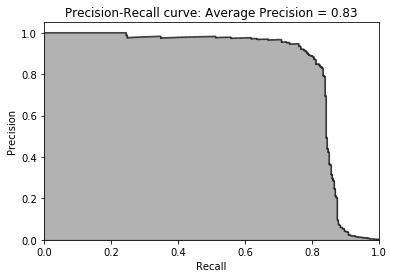

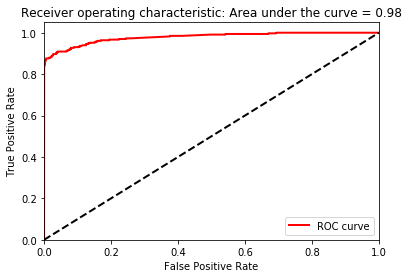

In [98]:
preds = pd.concat([y_train,predictionsBasedOnKFoldsEnsemble.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

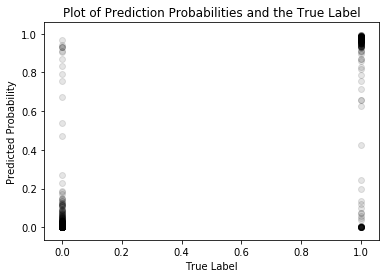

In [99]:
scatterData = predictionsTestSetLightGBMGradientBoosting.join(y_test,how='left')
scatterData.columns = ['Predicted Probability','True Label']
ax = sns.regplot(x="True Label", y="Predicted Probability", color='k', 
                 fit_reg=False, scatter_kws={'alpha':0.1},
                 data=scatterData).set_title( \
                'Plot of Prediction Probabilities and the True Label')

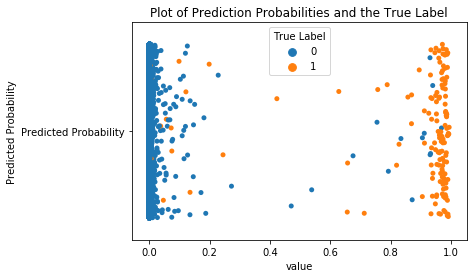

In [100]:
scatterDataMelted = pd.melt(scatterData, "True Label", \
                            var_name="Predicted Probability")
scatterDataMelted.head()
ax = sns.stripplot(x="value", y="Predicted Probability", \
                   hue='True Label', jitter=0.4, \
                   data=scatterDataMelted).set_title( \
                   'Plot of Prediction Probabilities and the True Label')

In [34]:
'''새로운 데이터를 위한 파이프라인'''
# 첫번째, 'newData'로 불리는 데이터 프레임에 새로운 데이터 불러오기
# 두번째, 데이터 스케일
# newData.loc[:,featuresToScale] = sX.transform(newData[featuresToScale])
# 세번째, LightGBM을 사용한 예측
# gbm.predict(newData, num_iteration=gbm.best_iteration)

'새로운 데이터를 위한 파이프라인'